## Decision Tree

> 한 번 분기때 마다 변수 영역을 두 개로 구분하며,  타겟변수(Y)가 "Categorical Variable(범주형)인 변수"
- 분류나무는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행

### 데이터셋 및 필요 패키기 로드

In [13]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split  

In [8]:
iris=load_iris()
print(iris.DESCR[:1200])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
#import data
X = iris['data']
y = iris['target']
col_names = iris.feature_names
iris_df = pd.DataFrame(data=np.concatenate((X,y.reshape(-1,1)), axis=1), columns= ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'target'])

In [10]:
# target: 0,1,2 총 3개
# 0 : setosa 1 : versicolour 2 : virginica
print(np.unique(iris_df.target).astype('int'))
iris_df.head()

[0 1 2]


,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
# 변수 타입 확인
iris_df.dtypes

sepal_l    float64
sepal_w    float64
petal_l    float64
petal_w    float64
target     float64
dtype: object

### train / test set 분리

In [17]:
#train test 분리

X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,:-1], iris_df.iloc[:,-1], test_size=0.2, random_state=0)
y_test.head()

114    2.0
62     1.0
33     0.0
107    2.0
7      0.0
Name: target, dtype: float64

## 모델링

In [18]:
clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=0) 

# entropy로 분기할 때는 criterion을 'entropy'로 변경

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
# y_pred_prob: 기존 class대로 class가 될 확률을 뱉어준 형태
# 0번 class일 확률 0 1번 class일 확률 2.4 2번 class일 확률 97.5 
y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob[0]

array([0.        , 0.02439024, 0.97560976])

In [22]:
# 최종 class
y_pred = clf_tree.predict(X_test)
print(y_pred)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [23]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.9583333333333334
Test_Accuracy: 0.9666666666666667


## 시각화

In [26]:
from six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

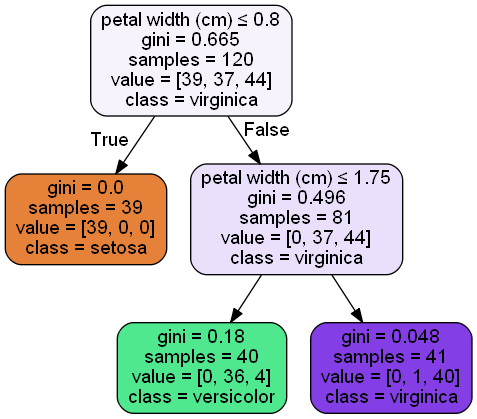

In [27]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(clf_tree, feature_names=col_names, out_file = dot_file, class_names=iris.target_names , \
                     filled =True, rounded=True, special_characters=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

# class0: setosa, class1: versicolor, class2: virginica
Image(graph.create_png())